In [9]:
import numpy as np
import matplotlib.pyplot as plt
import utilities
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report

In [10]:
input_file = 'E://tensorflow//jupyter//machine_learing_damo//3.data//data_multivar.txt'
X,Y = utilities.load_data(input_file)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=5)

E:\tensorflow\jupyter\machine_learing_damo\3.预测建模\utilities.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)


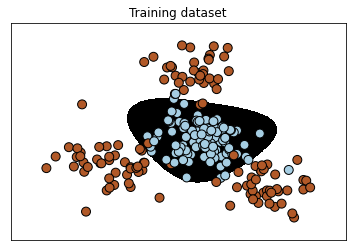

In [11]:
params = {'kernel': 'rbf'}   #径向基核函数
classifier = SVC(**params) 
classifier.fit(X_train, Y_train) 
utilities.plot_classifier(classifier, X_train, Y_train, 'Training dataset')
plt.show() 

In [21]:
input_datapoints = np.array([[2, 1.5], [8, 9], [4.8, 5.2], [4, 4], [2.5, 7], [7.6, 2], [5.4, 5.9]]) 
print("\nDistance from the boundary:")
for i in input_datapoints:
    i = np.array(i).reshape(1,-1)
    print(i, '-->', classifier.decision_function(i)[0])


Distance from the boundary:
[[2.  1.5]] --> 1.4641534796440951
[[8. 9.]] --> 1.2027833384010422
[[4.8 5.2]] --> -1.9202588134880436
[[4. 4.]] --> -0.13555127690004642
[[2.5 7. ]] --> 0.6173950571872193
[[7.6 2. ]] --> 2.0058455177573045
[[5.4 5.9]] --> -1.3395252492125262


In [23]:
# 测量置信度
params = {'kernel': 'rbf', 'probability': True}
classifier = SVC(**params)
classifier.fit(X_train, Y_train) 
print("\nConfidence measure:")
for i in input_datapoints:
    i = np.array(i).reshape(1,-1)
    print(i, '-->', classifier.predict_proba(i)[0])


Confidence measure:
[[2.  1.5]] --> [0.01477986 0.98522014]
[[8. 9.]] --> [0.03061236 0.96938764]
[[4.8 5.2]] --> [0.99568054 0.00431946]
[[4. 4.]] --> [0.58841002 0.41158998]
[[2.5 7. ]] --> [0.14336784 0.85663216]
[[7.6 2. ]] --> [0.00319493 0.99680507]
[[5.4 5.9]] --> [0.97745291 0.02254709]


E:\tensorflow\jupyter\machine_learing_damo\3.预测建模\utilities.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)


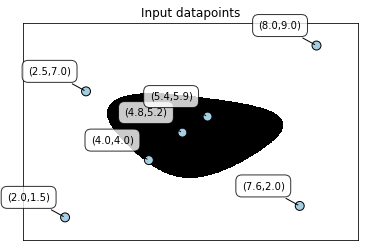

In [24]:
utilities.plot_classifier(classifier, input_datapoints, [0]*len(input_datapoints), 'Input datapoints', 'True') 